In [ ]:
################################   NOTES   ##############################ex
# Lines of code that are to be excluded from the documentation are      #ex
# marked with `#ex` at the end of the line.                             #ex
#                                                                       #ex
# To ensure that figures are displayed correctly together with widgets  #ex
# in the sphinx documentation we will include screenshots of some of    #ex
# the produced figures.                                                 #ex
# Do not run cells with the `display(Image('path_to_image'))` code to   #ex
# avoid duplication of results in the notebook.                         #ex
#                                                                       #ex
# Some reStructuredText 2 (ReST) syntax is included to aid in           #ex
# conversion to ReST for the sphinx documentation.                      #ex
#########################################################################ex
notebook_dir = %pwd                                                     #ex
import pysces                                                           #ex
import psctb                                                            #ex
import numpy                                                            #ex
from os import path                                                     #ex
from IPython.display import display, Image                              #ex
from sys import platform                                                #ex
%matplotlib inline                               

# Basic Usage

This section gives a quick overview of some features and conventions that are common to all the main analysis tools. While the main analysis tools will be briefly referenced here, later sections will cover them in full.

## Syntax

As PySCeSToolbox was designed to work on top of PySCeS, many of its conventions are employed in this project. The syntax (or naming scheme) for referring to model variables and parameters is the most obvious legacy. Syntax is briefly described in the table below and relates to the provided [example model](included_files.html#example-model-psc) (for input file syntax refer to the [PySCeS model descriptor language documentation](http://pysces.sourceforge.net/docs/inputfile_doc.html)): 

|Description | Syntax description | PySCeS example | Rendered LaTeX example  | 
|------------------------------------------|------------------------------------------------|--------------------|----------------------------------------------------|
| Parameters | As defined in model file  | Keq2 | $Keq2$ |
| Species | As defined in model file | S1 | $S1$ |
| Reactions | As defined in model file | R1 | $R1$ |
| Steady state species | “\_ss” appended to model definition | S1_ss | $S1_{ss}$ |
| Steady state reaction rates (Flux) | “J\_” prepended to model definition | J_R1 | $J_{R1}$ |
| Control coefficients | In the format “ccJreaction_reaction” | ccJR1_R2 | $C^{JR1}_{R2}$ |
| Elasticity coefficients | In the format “ecreaction_modifier” | ecR1_S1 or ecR2_Vf1 | $\varepsilon^{R1}_{S1}$ or $\varepsilon^{R2}_{Vf2}$ |
| Response coefficients | In the format “rcJreaction_parameter” | rcJR3_Vf3 | $R^{JR3}_{Vf3}$ |
| Partial response coefficients | In the format “prcJreaction_parameter_reaction” | prcJR3_X2_R2 | $^{R2}R^{JR3}_{X2}$ |
| Control patterns | CPn where n is an number assigned to a specific control pattern | CP4 | $CP4$ |
| Flux contribution by specific term | In the format "J_reaction_term" | J_R1_binding | $J_{R1_{binding}}$ |
| Elasticity contribution by specific term | In the format "pecreaction_modifier_term" | pecR1_S1_binding | $\varepsilon^{R1_{binding}}_{S1}$ |

.. note:: Any underscores (\_) in model defined variables or parameters will be removed when rendering to LaTeX to ensure consistency.


## Saving and Default Directories

Whenever any analysis tool is used for the first time on a specific model, a directory is created within the PySCeS output directory that corresponds to the model name. A second directory which corresponds to the analysis tool name will be created within the first. These directories serve a dual purpose:

The fist, and most pertinent to the user, is for providing a default location for saving results. PySCeSToolbox allows users to save results to any arbitrary location on the file system, however when no location is provided, results will be saved to the default directory corresponding to the model name and analysis method as described above.  We consider this a fairly intuitive and convenient system that is especially useful for outputting small sets of results. Result saving functionality is usually provided by a `save_results` method for each respective analysis tool. Exceptions are `RateChar` where multiple types of results may be saved, each with their own method, and `ScanFig` where figures are saved simply with a `save` method.

The second purpose is to provide a location for writing temporary files and internal data that is used to save “analysis sessions” for later loading. In this case specifying the output destination is not supported in most cases and these features depend on the default directory. Session saving functionality is provided only for tools that take significant amounts of time to generate results and will always be provided by a `save_session` method  and a corresponding `load_session` method will read these results from disk.

.. note:: Depending on your OS the default PySCeS directory will be either `~/Pysces` or `C:\Pysces` (on Windows with PySCeS versions up to 0.9.7) or ``C:\Users\<username>\Pysces`` (on Windows with PySCeS version 0.9.8+). PySCeSToolbox will therefore create the following type of folder structure: `~/Pysces/model_name/analysis_method/` or `C:\Pysces\model_name\analysis_method\` or ``C:\Users\<username>\Pysces\model_name\analysis_method\`` depending on your configuration.

## Plotting and Displaying Results

As already mentioned previously, PySCeSToolbox includes the functionality to plot results generated by its tools. Typically these plots will either contain results from a parameter scan where some metabolic variables are plotted against a change in parameter, or they will contain results from a time simulation where the evolution of metabolic variables over a certain time period are plotted. 

### Data2D

The `Data2D` class provides functionality for capturing raw parameter scan/simulation results and provides an interface to the actual plotting tool `ScanFig.` It is used internally by other tools in PySCeSToolbox and a `Data2D` object will be created and returned automatically after performing a parameter scan with any of the `do_par_scan` methods provided by these tools. 

#### Features

* Access to scan/simulation results through its `scan_results` dictionary.
* The ability to save results in the form of a `csv` file using the `save_results` method. 
* The ability to generate a `ScanFig` object via the `plot` method.


#### Usage example
Below is an usage example of Data2D, where results from a PySCeS parameter scan are saved to a 
 object.

In [2]:
# PySCeS model instantiation using the `example_model.py` file
# with name `mod`
mod = pysces.model('example_model')
mod.SetQuiet()

# Parameter scan setup and execution
# Here we are changing the value of `Vf2` over logarithmic
# scale from `log10(1)` (or 0) to log10(100) (or 2) for a
# 100 points. 
mod.scan_in = 'Vf2'
mod.scan_out = ['J_R1','J_R2','J_R3']
mod.Scan1(numpy.logspace(0,2,100))

# Instantiation of `Data2D` object with name `scan_data`
column_names = [mod.scan_in] + mod.scan_out

scan_data = psctb.utils.plotting.Data2D(mod=mod,
                                        column_names=column_names,
                                        data_array=mod.scan_res)

Assuming extension is .psc
Using model directory: /home/jr/Pysces/psc
/home/jr/Pysces/psc/example_model.psc loading ..... 
Parsing file: /home/jr/Pysces/psc/example_model.psc
 
Calculating L matrix . . . . . . .  done.
Calculating K matrix . . . . . . .  done.
 


Results that can be accessed via `scan_results`:

In [3]:
# Each key represents a field through which results can be accessed
list(scan_data.scan_results.keys())

['scan_in', 'scan_out', 'scan_range', 'scan_results', 'scan_points']

e.g. The first 10 data points for the scan results:

In [4]:
scan_data.scan_results.scan_results[:10,:]

array([[10.92333359,  0.97249011,  9.95084348],
       [10.96942935,  1.01871933,  9.95071002],
       [11.01771234,  1.06714226,  9.95057008],
       [11.06828593,  1.1178626 ,  9.95042334],
       [11.12125839,  1.17098892,  9.95026946],
       [11.176743  ,  1.2266349 ,  9.9501081 ],
       [11.23485838,  1.28491951,  9.94993887],
       [11.29572869,  1.34596731,  9.94976138],
       [11.35948389,  1.40990867,  9.94957522],
       [11.42626002,  1.47688006,  9.94937996]])

Results can be saved using the default path as discussed in *#Saving and default directories#* with the `save_results` method:

In [5]:
scan_data.save_results()

Or they can be saved to a specified location:

In [6]:
# This path leads to the Pysces root folder
data_file_name = '~/Pysces/example_mod_Vf2_scan.csv'

# Correct path depending on platform - necessary for platform independent scripts
if platform == 'win32' and pysces.version.current_version_tuple() < (0,9,8):
    data_file_name = psctb.utils.misc.unix_to_windows_path(data_file_name)
else:
    data_file_name = path.expanduser(data_file_name)

scan_data.save_results(file_name=data_file_name)

Finally, a `ScanFig` object can be created using the `plot` method:

In [7]:
# Instantiation of `ScanFig` object with name `scan_figure`
scan_figure = scan_data.plot()

### ScanFig

The `ScanFig` class provides the actual plotting object. This tool allows users to display figures with results directly in the Notebook and to control which data is displayed on the figure by use of an interactive widget based interface. As mentioned and shown above they are created by the `plot` method of a Data2D object, which means that a user never has the need to instantiate ScanFig directly. 

#### Features

* Interactive plotting via the `interact` method.
* Script based plot generation where certain lines, or categories of lines (based on the type of information they represent), can be enabled and disabled via `toggle_line` or `toggle_category` methods. 
* Saving of plots with the `save` method.
* Customisation of figures using standard `matplotlib` functionality. 

#### Usage Example

Below is an usage example of `ScanFig` using the `scan_figure` instance created in the previous section. Here results from the parameter scan of `Vf2` as generated by `Scan1` is shown.

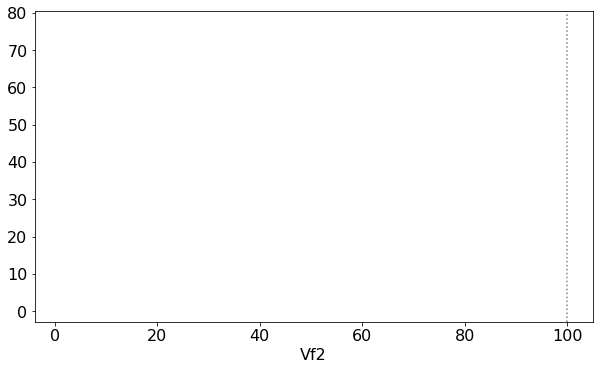

Widget Javascript not detected.  It may not be installed or enabled properly.


Widget Javascript not detected.  It may not be installed or enabled properly.


Widget Javascript not detected.  It may not be installed or enabled properly.


Widget Javascript not detected.  It may not be installed or enabled properly.


Widget Javascript not detected.  It may not be installed or enabled properly.


Widget Javascript not detected.  It may not be installed or enabled properly.


In [8]:
scan_figure.interact()
#remove_next

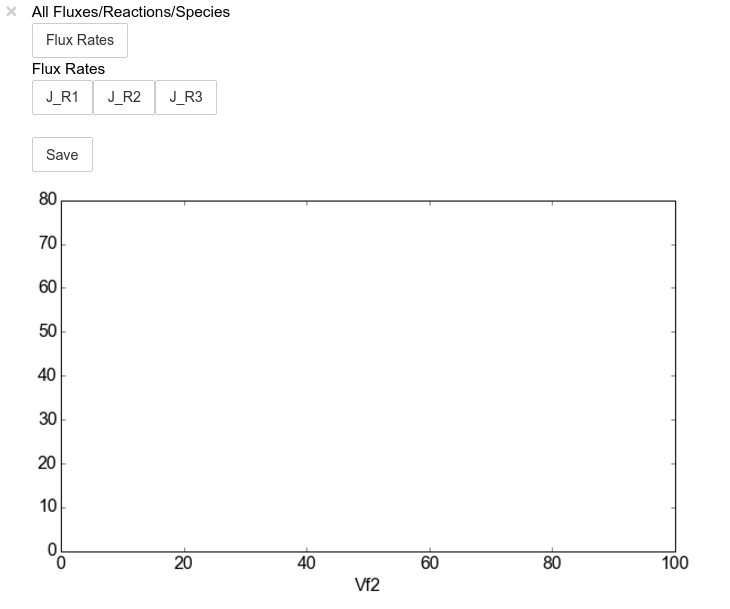

In [9]:
# To avoid duplication - do not run                               #ex
display(Image(path.join(notebook_dir,'images','scan_fig_1.png'))) #ex

The Figure shown above is empty - to show lines we need to click on the buttons. First we will click on the `Flux Rates` button which will allow any of the lines that fall into the category `Flux Rates` to be enabled. Then we click the other buttons:

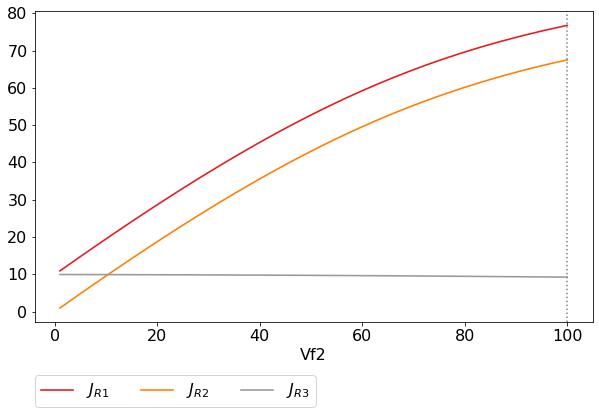

In [10]:
# The four method calls below are equivalent to clicking the category buttons
# scan_figure.toggle_category('Flux Rates',True)
# scan_figure.toggle_category('J_R1',True)
# scan_figure.toggle_category('J_R2',True)
# scan_figure.toggle_category('J_R3',True)

scan_figure.interact()
#remove_next

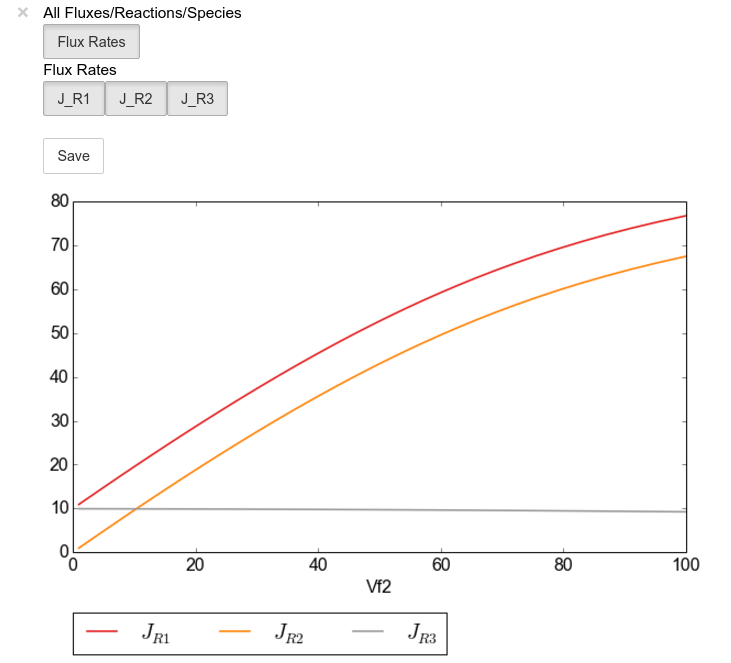

In [11]:
# To avoid duplication - do not run                               #ex
display(Image(path.join(notebook_dir,'images','scan_fig_2.png'))) #ex

.. note:: Certain buttons act as filters for results that fall into their category. In the case above the `Flux Rates` button determines the visibility of the lines that fall into the `Flux Rates` category. In essence it overwrites the state of the buttons for the individual line categories. This feature is useful when multiple categories of results (species concentrations, elasticities, control patterns etc.) appear on the same plot by allowing to toggle the visibility of all the lines in a category.

We can also toggle the visibility with the `toggle_line` and `toggle_category` methods. Here `toggle_category` has the exact same effect as the buttons in the above example, while `toggle_line` bypasses any category filtering. The line and category names can be accessed via `line_names` and `category_names`:

In [12]:
print('Line names     : ', scan_figure.line_names)
print('Category names : ', scan_figure.category_names)

Line names     :  ['J_R1', 'J_R2', 'J_R3']
Category names :  ['J_R2', 'Flux Rates', 'J_R1', 'J_R3']


In the example below we set the `Flux Rates` visibility to `False`, but we set the `J_R1` line visibility to `True`. Finally we use the `show` method instead of `interact` to display the figure. 

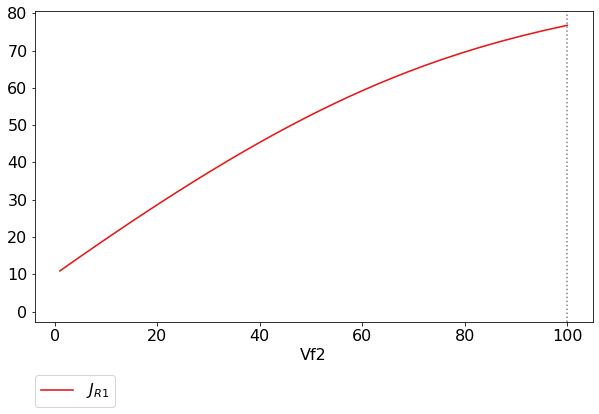

In [13]:
scan_figure.toggle_category('Flux Rates',False)
scan_figure.toggle_line('J_R1',True)
scan_figure.show()

The figure axes can also be adjusted via the `adjust_figure` method. Recall that the `Vf2` scan was performed for a logarithmic scale rather than a linear scale. We will therefore set the x axis to log and its minimum value to `1`. These settings are applied by clicking the `Apply` button. 

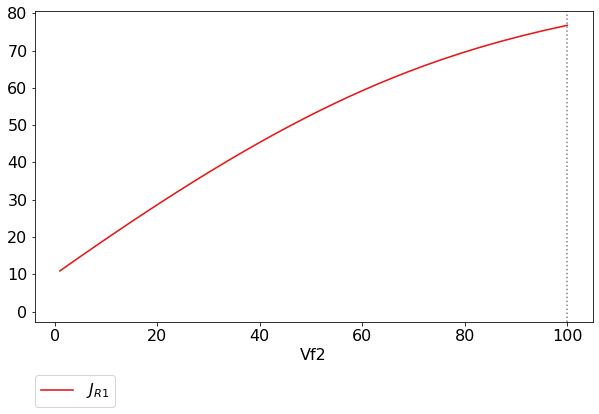

Widget Javascript not detected.  It may not be installed or enabled properly.


Widget Javascript not detected.  It may not be installed or enabled properly.


Widget Javascript not detected.  It may not be installed or enabled properly.


Widget Javascript not detected.  It may not be installed or enabled properly.


Widget Javascript not detected.  It may not be installed or enabled properly.


Widget Javascript not detected.  It may not be installed or enabled properly.


Widget Javascript not detected.  It may not be installed or enabled properly.


Widget Javascript not detected.  It may not be installed or enabled properly.


Widget Javascript not detected.  It may not be installed or enabled properly.


Widget Javascript not detected.  It may not be installed or enabled properly.


In [14]:
scan_figure.adjust_figure()
#remove_next

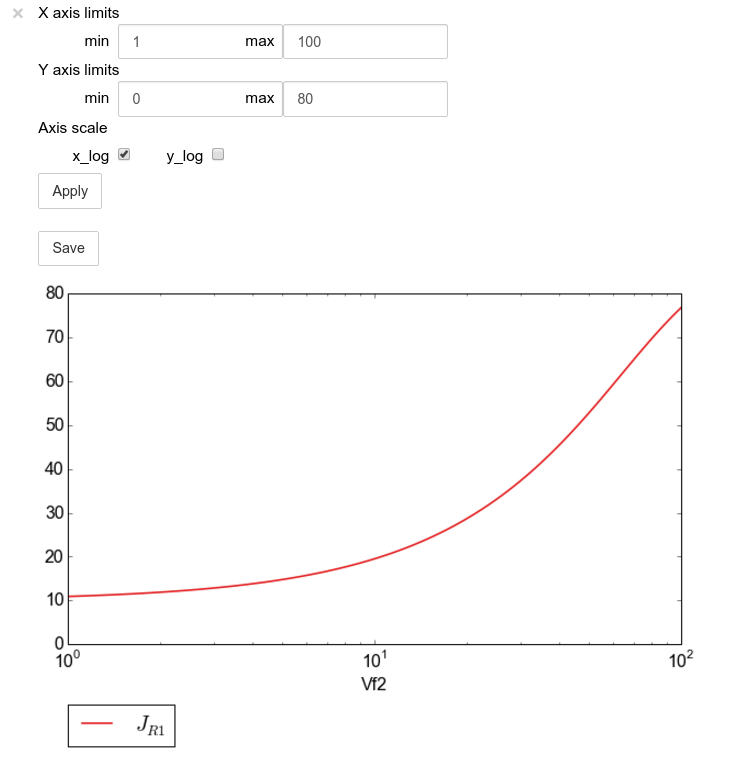

In [15]:
# To avoid duplication - do not run                               #ex
display(Image(path.join(notebook_dir,'images','scan_fig_3.png'))) #ex

The underlying `matplotlib` objects can be accessed through the `fig` and `ax` fields for the figure and axes, respectively. This allows for manipulation of the figures using `matplotlib's` functionality. 

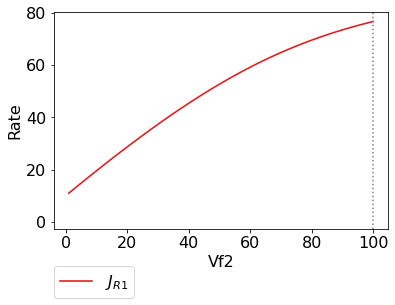

In [16]:
scan_figure.fig.set_size_inches((6,4))
scan_figure.ax.set_ylabel('Rate')
scan_figure.line_names
scan_figure.show()

Finally the plot can be saved using the `save` method (or equivalently by pressing the `save` button) without specifying a path where the file will be saved as an `svg` vector image to the default directory as discussed under *#Saving and default directories#*:

In [17]:
scan_figure.save()

A file name together with desired extension (and image format) can also be specified:

In [18]:
# This path leads to the Pysces root folder
fig_file_name = '~/Pysces/example_mod_Vf2_scan.png'

# Correct path depending on platform - necessary for platform independent scripts
if platform == 'win32' and pysces.version.current_version_tuple() < (0,9,8):
    fig_file_name = psctb.utils.misc.unix_to_windows_path(fig_file_name)
else:
    fig_file_name = path.expanduser(fig_file_name)
    
scan_figure.save(file_name=fig_file_name)

### Tables

In PySCeSToolbox, results are frequently stored in an dictionary-like structure belonging to an analysis object. In most cases the dictionary will be named with `_results` appended to the type of results (e.g. Control coefficient results in `SymCa` are saved as `cc_results` while the parametrised internal metabolite scan results of `RateChar` are saved as `scan_results`). 

In most cases the results stored are structured so that a single dictionary key is mapped to a single result (or result object). In these cases simply inspecting the variable in the IPython/Jupyter Notebook displays these results in an html style table where the variable name is displayed together with it's value e.g. for `cc_results` each control coefficient will be displayed next to its value at steady-state. 

Finally, any 2D data-structure commonly used in together with PyCSeS and PySCeSToolbox can be displayed as an html table (e.g. list of lists, NumPy arrays, SymPy matrices). 

#### Usage Example

Below we will construct a list of lists and display it as an html table.Captions can be either plain text or contain html tags.

In [19]:
list_of_lists = [['a','b','c'],[1.2345,0.6789,0.0001011],[12,13,14]]

In [20]:
psctb.utils.misc.html_table(list_of_lists,
                            caption='Example')

a,b,c
1.23,0.68,0.00
12.00,13.00,14.00


By default floats are all formatted according to the argument `float_fmt` which defaults to `%.2f` (using the standard Python formatter string syntax). A formatter function can be passed to as the `formatter` argument which allows for more customisation. 

Below we instantiate such a formatter using the `formatter_factory` function. Here all float values falling within the range set up by `min_val` and `max_val` (which includes the minimum, but excludes the maximum) will be formatted according to `default_fmt`, while outliers will be formatted according to `outlier_fmt`.

In [21]:
formatter = psctb.utils.misc.formatter_factory(min_val=0.1,
                                               max_val=10,
                                               default_fmt='%.1f',
                                               outlier_fmt='%.2e')

The constructed `formatter` takes a number (e.g. float, int, etc.) as argument and returns a formatter string according to the previously setup parameters. 

In [22]:
print(formatter(0.09)) # outlier
print(formatter(0.1))  # min for default
print(formatter(2))    # within range for default
print(formatter(9))    # max int for default
print(formatter(10))   # outlier

9.00e-02
0.1
2.0
9.0
1.00e+01


Using this `formatter` with the previously constructed `list_of_lists` lead to a differently formatted html representation of the data:

In [23]:
psctb.utils.misc.html_table(list_of_lists, 
                            caption='Example',
                            formatter=formatter,    # Previously constructed formatter
                            first_row_headers=True) # The first row can be set as the header

a,b,c
1.2,0.7,1.01e-04
1.20e+01,1.30e+01,1.40e+01


## Graphic Representation of Metabolic Networks

PySCeSToolbox includes functionality for displaying interactive graph representations of metabolic networks through the `ModelGraph` tool. The main purpose of this feature is to allow for the visualisation of control patterns in `SymCa`. Currently, this tool is fairly limited in terms of its capabilities and therefore does not represent a replacement for more fully featured tools such as e.g. CellDesigner. One such limitation is that no automatic layout capabilities are included, and nodes representing species and concentrations have to be laid out by hand. Nonetheless it is useful for quickly visualising the structure of  pathway and, as previously mentioned, for visualising the importance of various control patterns in `SymCa`. 

### Features

* Displays interactive (d3.js based) reaction networks in the notebook.
* Layouts can be saved and applied to other similar networks.

### Usage Example

The main use case is for visualising control patterns. However, `ModelGraph` can be used in this capacity, the graph layout has to be defined. Below we will set up the layout for the `example_model`.

First we load the model and instantiate a `ModelGraph` object using the model. The show method displays the graph.

In [24]:
model_graph = psctb.ModelGraph(mod)


Unless a layout has been previously defined, the species and reaction nodes will be placed randomly. Nodes are snap to an invisible grid. 

In [25]:
model_graph.show()

Widget Javascript not detected.  It may not be installed or enabled properly.


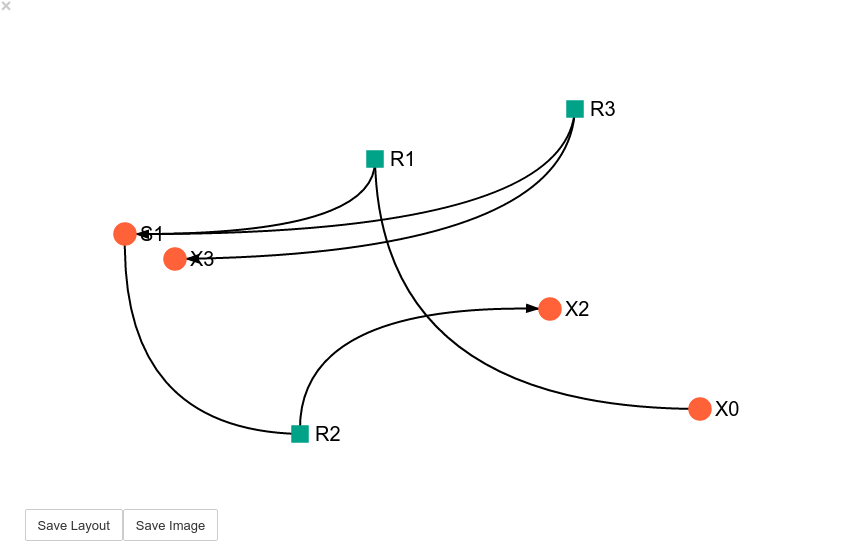

In [26]:
# To avoid duplication - do not run                                  #ex
display(Image(path.join(notebook_dir,'images','model_graph_1.png'))) #ex

A layout file for the `example_model` is [included](included_files.html#layout-file) (see link for details) and can be loaded by specifying the location of the layout file on the disk during `ModelGraph` instantiation.  

In [27]:
# This path leads to the provided layout file 
path_to_layout = '~/Pysces/psc/example_model_layout.dict'

# Correct path depending on platform - necessary for platform independent scripts
if platform == 'win32' and pysces.version.current_version_tuple() < (0,9,8):
    path_to_layout = psctb.utils.misc.unix_to_windows_path(path_to_layout)
else:
    path_to_layout = path.expanduser(path_to_layout)


model_graph = psctb.ModelGraph(mod, pos_dic=path_to_layout)
model_graph.show()

Widget Javascript not detected.  It may not be installed or enabled properly.


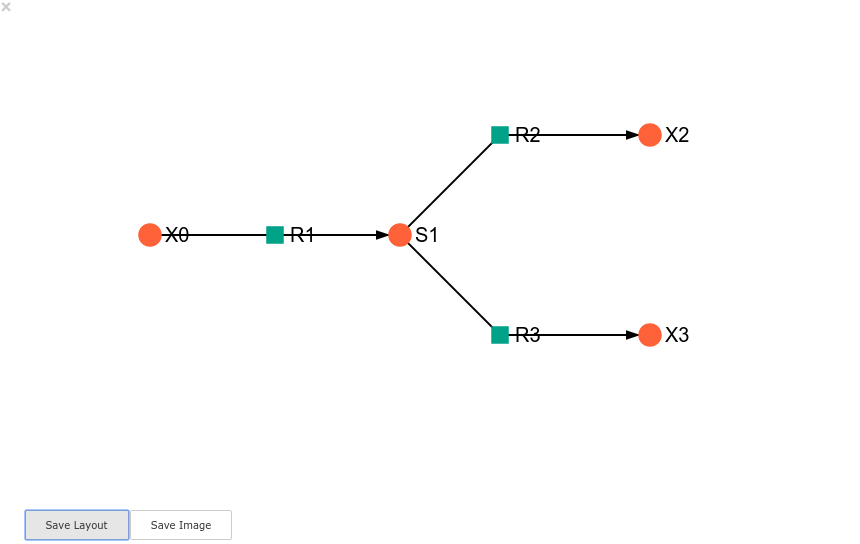

In [28]:
# To avoid duplication - do not run                                  #ex
display(Image(path.join(notebook_dir,'images','model_graph_2.png'))) #ex

Clicking the `Save Layout` button saves this layout to the `~/Pysces/example_model/model_graph` or `C:\Pysces\example_model\model_graph` directory for later use. The `Save Image` Button wil save an svg image of the graph to the same location.

Now any future instantiation of a `ModelGraph` object for `example_model` will use the saved layout automatically. 

In [29]:
model_graph = psctb.ModelGraph(mod)
model_graph.show()

Widget Javascript not detected.  It may not be installed or enabled properly.


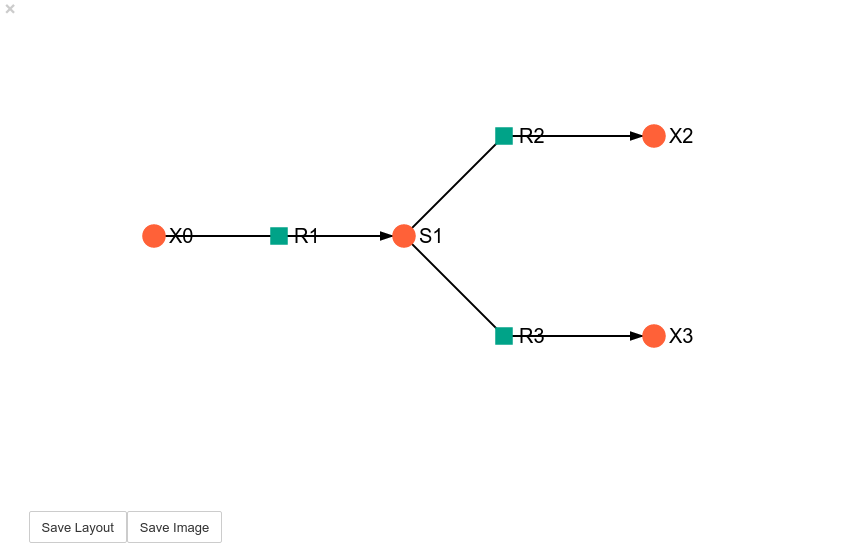

In [30]:
# To avoid duplication - do not run                                  #ex
display(Image(path.join(notebook_dir,'images','model_graph_3.png'))) #ex